In [1]:
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

import os

#Prevent TensorFlow from accessing the GPU (i.e. only use CPU); this must be done before importing TF
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from sutils import *
import numpy as np
from sklearn.metrics import confusion_matrix

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K

C:\Users\WF4\Anaconda3\envs\tf18_py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
limit_gpu_mem()

### Import MNIST Data

In [3]:
# Import MNIST from TF Examples
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/mnist/", one_hot=True)

# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


### Set Hyperparameters

In [5]:
batch_size = 256
num_classes = 10
epochs = 10
learning_rate = 0.001

# input image dimensions
img_rows, img_cols = 28, 28

### Transform MNIST Data

In [7]:
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

channels_last


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (55000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
55000 train samples
10000 test samples


### Define a Convolutational Neural Network Model

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', name = 'Conv_01', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', name = 'Conv_02'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'MaxPool_01'))
model.add(Dropout(0.25, name = 'Dropout_01'))
model.add(Flatten(name = 'Flatten_01'))
model.add(Dense(128, activation='relu', name = 'Dense_01'))
model.add(Dropout(0.5, name = 'Dropout_02'))
model.add(Dense(num_classes, activation='softmax', name = 'Dense_02'))

Another way to define your model:

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Flatten_01 (Flatten)         (None, 9216)              0         
_________________________________________________________________
Dense_01 (Dense)             (None, 128)               1179776   
_________________________________________________________________
Dropout_02 (Dropout)         (None, 128)               0         
__________

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

### Train the model

In [13]:
%%time
hist = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 131us/step - loss: 1.2793 - acc: 0.5744 - val_loss: 0.3782 - val_acc: 0.8931ss: 1.2819 - acc: 0.573
Epoch 2/10
55000/55000 [==============================] - 5s 98us/step - loss: 0.4888 - acc: 0.8486 - val_loss: 0.2757 - val_acc: 0.9184
Epoch 3/10
55000/55000 [==============================] - 5s 99us/step - loss: 0.4154 - acc: 0.8717 - val_loss: 0.2308 - val_acc: 0.9286
Epoch 4/10
55000/55000 [==============================] - 5s 99us/step - loss: 0.3718 - acc: 0.8863 - val_loss: 0.2014 - val_acc: 0.9407
Epoch 5/10
55000/55000 [==============================] - 5s 99us/step - loss: 0.3507 - acc: 0.8933 - val_loss: 0.1862 - val_acc: 0.9462 - ETA: 0s - loss: 0.3523 - 
Epoch 6/10
55000/55000 [==============================] - 5s 99us/step - loss: 0.3260 - acc: 0.8999 - val_loss: 0.1790 - val_acc: 0.94734s  - ET - ETA: 0s - loss: 0.3280 - acc: 0 - ETA: 0s - loss: 0.3271 - acc: 0.

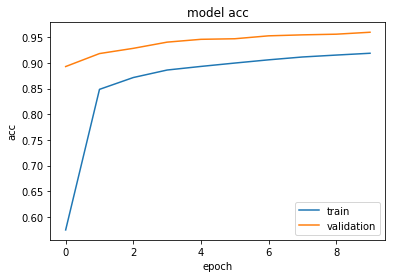

In [14]:
plot_train(hist)

### Plot the Confusion Matrix

In [15]:
preds = model.predict(X_test)
preds_labels = np.array(np.argmax(preds,axis=1), dtype='float32')
true_labels = np.array(np.where(Y_test==1)[1], dtype='float32')

In [ ]:
def plot_confusion_matrix(conf_mat, label_names):
    norm_conf = []
    for i in conf_mat:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')
    width, height = conf_mat.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_mat[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size=8)

    cb = fig.colorbar(res)
    plt.xticks(range(width), label_names[:width])
    plt.yticks(range(height), label_names[:height])
    plt.xlabel('Predicted Label', size=16)
    plt.ylabel('True Label', size=16)
    plt.show()

In [ ]:
conf_mat = confusion_matrix(true_labels, preds_labels)
plot_confusion_matrix(conf_mat, label_names=['0','1','2','3','4','5','6','7','8','9'])

### Save the model to a HDF5 file

Save the weights, model architecture, training configuration (loss, optimizer), and state of the optimizer to allow you to resume training where you left off.

In [ ]:
model.save(os.path.join('models' ,'cnn_mnist_model.h5'))

Save only the weights of the model.

In [ ]:
model.save_weights(os.path.join('models' ,'cnn_mnist_model_weights.h5'))

### Load the saved model and run it.

In [ ]:
model2 = load_model(os.path.join('models' ,'cnn_mnist_model.h5'))

In [ ]:
preds_2 = model2.predict(X_test)
preds_labels_2 = np.array(np.argmax(preds_2,axis=1), dtype='float32')
true_labels_2 = np.array(np.where(Y_test==1)[1], dtype='float32')
conf_mat_2 = confusion_matrix(true_labels_2, preds_labels_2)
plot_confusion_matrix(conf_mat_2, label_names=['0','1','2','3','4','5','6','7','8','9'])